# TP 2. PARTIE 2. PDA - QDA. k-NN
Samuel Cohen Boulakia

## Plan :

   [- Dataset Vowel](#1)
   
   [Naive Bayes- LDA-QDA](#2)
   
   [- k-NN](#3)   

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import pandas as pd
import seaborn as sns

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

names = ["Naive Bayes", "LDA", "QDA"]
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# 1. Dataset Vowel


https://web.stanford.edu/~hastie/ElemStatLearn/data.html

In [3]:
train=pd.read_csv('vowel.train.csv', sep=',', index_col=0)
train.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


In [4]:
test=pd.read_csv('vowel.test.csv', sep=',',index_col=0)
test.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-1.149,-0.904,-1.988,0.739,-0.060,1.206,0.864,1.196,-0.300,-0.467
2,2,-2.613,-0.092,-0.540,0.484,0.389,1.741,0.198,0.257,-0.375,-0.604
3,3,-2.505,0.632,-0.593,0.304,0.496,0.824,-0.162,0.181,-0.363,-0.764
4,4,-1.768,1.769,-1.142,-0.739,-0.086,0.120,-0.230,0.217,-0.009,-0.279
5,5,-2.671,3.155,-0.514,0.133,-0.964,0.234,-0.071,1.192,0.254,-0.471


In [5]:
print(train.shape)
print(test.shape)

(528, 11)
(462, 11)


On a 528 observations sur le Train et 462 observations sur le Test. Chacun des deux jeux de données contient 11 classes.

In [6]:
np.unique(train['y'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

C'est un problème de classification multi-classes avec 11 classes.
On vérifie si le nombre d'observations par classes (class balancing) est bien équilibré.

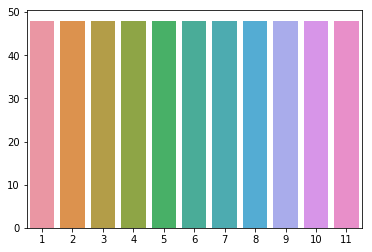

In [7]:
sns.barplot(np.unique(train['y']),train.groupby('y').count().values[:,0])

Les classes sont donc bien équilibrées. 

On finit par définir les matrices X_train,  X_test de features et les vecteurs Y_train, Y_test de labels.

In [8]:
y_train = train.values[:,0]
X_train = train.values[:,1:]
print(X_train.shape)

(528L, 10L)


In [9]:
y_test = test.values[:,0]
X_test = test.values[:,1:]
print(X_test.shape)

(462L, 10L)


Les matrices X_train et X_test ont 10 classes car la colonne "y" est qualitative.

In [10]:
names = ["Naive Bayes", "LDA", "QDA"]
classifiers = [ GaussianNB(), LinearDiscriminantAnalysis(),QuadraticDiscriminantAnalysis()]

On définit un tableau de noms avec les différentes méthodes et un tableau classifiers qui contient ces méthodes implémentées par Python (via les import). Ces tableaux vont nous aidés par la suite pour créer une boucle qui permettra de comparer les méthodes.


# Naive Bayes- LDA-QDA

La méthode  score teste les performances de prédiction d'un classifieur dans lequel on passe un jeu de données annoté. Il renvoie ainsi le pourcentage de prédiction véridique trouvée par le classifieur. Plus le pourcentage est proche de 100, meilleure sera la méthode.

In [11]:
for name, clf in zip(names, classifiers):
    clf_fit = clf.fit(X=X_train, y=y_train)
    print("Le score sur le train avec la méthode", name , "est %.3f" % accuracy_score(clf_fit.predict(X_train),y_train),".")
    print("Le score sur le test avec la méthode", name , "est %.3f" % accuracy_score(clf_fit.predict(X_test),y_test),".")

('Le score sur le train avec la m\xc3\xa9thode', 'Naive Bayes', 'est 0.720', '.')
('Le score sur le test avec la m\xc3\xa9thode', 'Naive Bayes', 'est 0.461', '.')
('Le score sur le train avec la m\xc3\xa9thode', 'LDA', 'est 0.684', '.')
('Le score sur le test avec la m\xc3\xa9thode', 'LDA', 'est 0.444', '.')
('Le score sur le train avec la m\xc3\xa9thode', 'QDA', 'est 0.989', '.')
('Le score sur le test avec la m\xc3\xa9thode', 'QDA', 'est 0.472', '.')


Donc la meilleure méthode est la QDA.

<img src="https://media1.giphy.com/media/LNXivXzMwd7W0/giphy.gif" width = 300>
<a id="3"></a> 
 
# 2. k-NN

https://openclassrooms.com/courses/initiez-vous-au-machine-learning/tp-entrainez-le-modele-des-k-plus-proches-voisins-k-nn

On va utiliser l'algorithme k-NN pour différents k et comparer ses performances avec les méthodes précédentes.

In [12]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [13]:
error = 1 - knn.score(X_test, y_test)
print('Erreur: %f' % error)

Erreur: 0.435065


L'erreur est équivalente à " 1- le score".

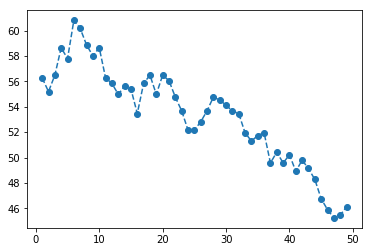

In [14]:
errors = []
for k in range(1,50):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(1,50), errors,'--o')
plt.show()

On voit que le k-NN le plus performant est celui pour lequel k = 6.
Notre classifieur optimal est donc 6-nn.

In [15]:
acc_train = []
acc_test = []
for k in np.arange(1,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_fit = knn.fit(X=X_train,y=y_train)
    acc_train.append(accuracy_score(knn_fit.predict(X_train),y_train))
    acc_test.append(accuracy_score(knn_fit.predict(X_test),y_test))

In [16]:
k_hat = np.argmax(acc_test)
print("Les scores : train ", ("%.3f" % acc_train[k_hat]), "/ test", ("%.3f" % acc_test[k_hat]))

('Les scores : train ', '0.977', '/ test', '0.608')


Avec le k-NN le plus performant, la précision est meilleure qu'avecr les autres méthodes vu précédemment.

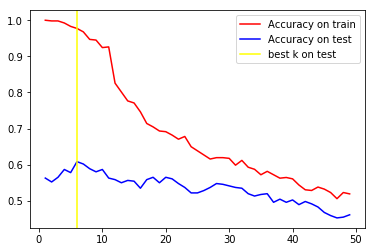

In [17]:
plt.plot(np.arange(1,50),acc_train,label="Accuracy on train",color='red')
plt.plot(np.arange(1,50),acc_test,label="Accuracy on test",color='blue')
plt.axvline(np.arange(1,50)[k_hat],label="best k on test",color='yellow')
plt.legend()